#**KNN Classification for Iris Dataset**

---



# **Iris Dataset**

The famous iris database, first used by Sir R. A. Fisher, is perhaps the best known dataset to be found in pattern recognition literature. There are 150 iris plants, each with 4 numeric attributes: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm. The task is to predict each plant as an iris-setosa, an iris-versicolor, or an iris-virginica based on these attributes.

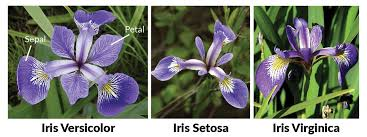

Importing all the necessary libraries that are used .

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The dataset is stored in a csv file, we can load it as a DataFrame using read_csv() in library pandas:

In [94]:
iris=pd.read_csv("datasets_19_420_Iris.csv")

Now inspect the dimensions and first few rows:

In [95]:
iris.shape

(150, 6)

We use the .head() function to view the first 5 rows:

In [96]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The column id is the row index, not really informative, so we can drop it from the dataset using drop() function:

In [97]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Summary Statistics**

Check the summary statistics:

In [98]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


All four features are numeric, each with different ranges. There are no missing values in any of the columns. Therefore, this is a clean dataset.

Class Distribution

The data set contains 3 classes of 50 instances each. We can check this by:

In [99]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Or simply use value_counts():

In [100]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The method value_counts() is a great utility for quickly understanding the distribution of the data. When used on the categorical data, it counts the number of unique values in the column of interest.

Iris is a balanced dataset as the data points for each class are evenly distributed.

# **Data visualization**

Univariate Plot

To better understand each attribute, start with univariate plots, that is, plots of each individual variable.

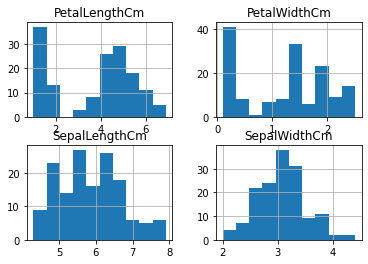

In [101]:
iris.hist()
plt.show()

This gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution. That is, the distribution has a beautiful symmetric bell shape. However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Less patterns were observed for the petal width.

Multivariate Plot

To see the interactions between attributes we use scatter plots. However, it's difficult to see if there's any grouping without any indication of the true species of the flower that a datapoint represents. Therefore, we define a color code for each species to differentiate species visually:

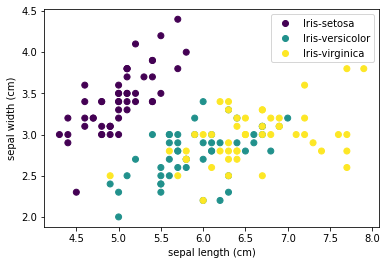

In [102]:
# build a dict mapping species to an integer code
inv_name_dict = {'Iris-setosa': 0, 
  'Iris-versicolor': 1,
  'Iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['Species']] 
# scatter plot
scatter = plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

Using sepal_length and sepal_width features, we can distinguish iris-setosa from others; separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.

Similarly, between petal length and width:

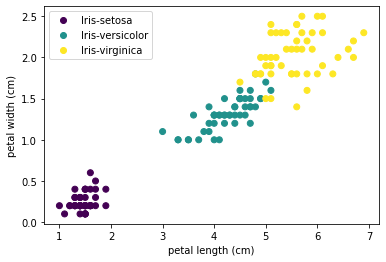

In [103]:
# scatter plot
scatter = plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()


Interestingly, the length and width of the petal are highly correlated, and these two features are very useful to identify various iris species. It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, indicating the difficulties for some classifiers. It is worth keeping in mind when training to decide which features we should use.
To see scatter plots of all pairs of features, use pandas.plotting.scatter_matrix

# **K nearest neighbours**

K nearest neighbors (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote.

Here we see that changing k could affect the output of the model. In knn, k is a hyperparameter. A hyperparameter in machine learning is a parameter whose value is set before the learning process begins. We will learn how to tune the hyperparameter later.

**Data Preparation**

Earlier we identified that the length and the width of the petals are the most useful features to separate the species; we then define the features and labels as follows:

In [104]:
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

Recall that to assess the performance of the model, we do so on data that is unseen by the model construction. As a result, we set aside some portion of the data as a test set to mimic the unknown data the model will be presented with in the future. As done in the previous module, we use train_test_split in sklearn.model_selection.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

We use a 70-30 split, i.e., 70% of the data is for training and 30% for testing. Note that we specified the split was stratified by label (y). This is done to ensure that the distribution of labels remains similar in both train and test sets:

In [106]:
y_train.value_counts()
y_test.value_counts()

Iris-setosa        15
Iris-versicolor    15
Iris-virginica     15
Name: Species, dtype: int64

**Modeling**

Now we are ready to build and train the model knn. First we import the class of the model:

In [107]:
from sklearn.neighbors import KNeighborsClassifier

Now create an instance knn from the class KNeighborsClassifier.

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)

Note that the only parameter we need to set in this problem is n_neighbors, or k as in knn. We set k to be 5 by random choice.

Use the data X_train and y_train to train the model:

In [109]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Label Prediction**

To make a prediction in scikit learn, we can call the method predict(). We are trying to predict the species of iris using given features in feature matrix X.
Let’s make the predictions on the test data set and save the output in pred for later review:

In [110]:
pred = knn.predict(X_test)

Let’s review the first five predictions:

In [111]:
pred[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

**Probability Prediction**

Of all classification algorithms implemented in scikit learn, there is an additional method 'predict_prob'. Instead of splitting the label, it outputs the probability for the target in array form. Let’s take a look at what the predicted probabilities are for the 11th and 12th flowers:

In [112]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

For example, the probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0. For the next flower, there is a 20% chance that it would be classified as iris-versicolor but 80% chance to be iris-virginica. What it tells us is that of the five nearest neighbours of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 are iris-virginica. To see the corresponding predictions:

In [113]:
pred[10:12]

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

**Accuracy**

In classification the most straightforward metric is accuracy. It calculates the proportion of data points whose predicted labels exactly match the observed labels.

In [114]:
print((pred==y_test.values).sum())
y_test.size

44


45

The classifier made one mistake. Thus, the accuracy is 44/45:

In [115]:
(pred==y_test.values).sum()/y_test.size

0.9777777777777777

Same as:

In [116]:
knn.score(X_test, y_test)

0.9777777777777777

**Confusion Matrix**

Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions, broken down by each class.

In classifying the iris, we can use confusion_matrix() under module sklearn.metrics:

In [117]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, pred, labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

We can visualize the confusion matrix:

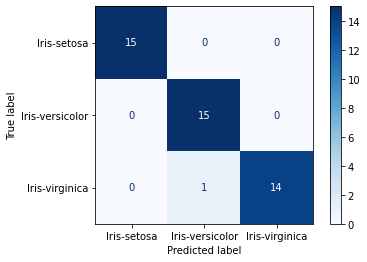

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

Here we specified the labels in order. Each column of the matrix corresponds to a predicted class, and each row corresponds to an actual class. So the row sums up to the total number of instances of the class.

The first row corresponds to the actual iris-setosa; [15, 0, 0] indicates that 15 of iris-setosa are correctly predicted, and none are mislabeled; while the last row [0, 1, 14] suggests that of 15 actual iris-virginica, 0 were predicted as iris-setosa, 1 was predicted to be iris-versicolor, and the remaining 14 were correctly identified as iris-virginica. This is consistent with our observation during exploratory data analysis, that is, there was some overlap between the two species on the scatter plot and it is more difficult to distinguish iris-versicolor from iris-virginica than identifying iris-setosa.

**K-fold Cross Validation**

Previously we made train-test split before fitting the model so that we can report the model performance on the test data. This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.

In k fold cross validation, the data is divided into k subsets. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

The simplest way to use k-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset:

In [119]:
from sklearn.model_selection import cross_val_score
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

Note that now we are fitting a 3nn model.

In [120]:
# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)


Each of the holdout set contains 20% of the original data.

In [121]:
# print each cv score (accuracy) 
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


As shown, due to the random assignments, the accuracies on the holdsets fluctuates from 0.9 to 1.

In [122]:
# then average them
cv_scores.mean()

0.9533333333333334

We can not rely on one single train-test split, rather we report that the 3nn model has an accuracy of 95.33% based on a 5-fold cross validation.

**Grid Search**

When we built our first knn model, we set the hyperparameter k to 5, and then to 3 later in k-fold cross validation; random choices really. What is the best k? Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. In scikit-learn, we use GridSearchCV, which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed the best.

In [123]:
from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

To check the top performing n_neighbors value:

In [124]:
knn_gscv.best_params_

{'n_neighbors': 4}

We can see that 4 is the best value for n_neighbors. What is the accuracy of the model when k is 4?

In [125]:
knn_gscv.best_score_

0.9666666666666668

By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%.

Now we are ready to build the final model:

In [126]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)
y_pred = knn_final.predict(X)
knn_final.score(X, y)

0.9733333333333334

We can report that our final model, 4nn, has an accuracy of 97.3% in predicting the species of iris!

**Label Prediction with New Data**

Now we are ready to deploy the model 'knn_final'. We take some measurements of an iris and record that the length and width of its sepal are 5.84 cm and 3.06 cm, respectively, and the length and width of its petal are 3.76 cm and 1.20 cm, respectively. How do we make a prediction using the built model?

Use model.predict. Since the model was trained on the length and width of petals, that’s the data we will need to make a prediction. Let’s put the petal length and petal width into a numpy array:

In [127]:
new_data = np.array([3.76, 1.20])

If we feed it to the model:

In [128]:
new_data = new_data.reshape(1, -1)

In [129]:
knn_final.predict(new_data)

array(['Iris-versicolor'], dtype=object)


**Our model predicts that this iris is a versicolor.**

References:https://www.sololearn.com/Play/data-science

Dataset:https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis?rvi=1